In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

import missingno as msno
import plotly.express as px
from matplotlib import cm
from matplotlib import style
from matplotlib import font_manager
from matplotlib import rc

rc('font', family='Arial Unicode MS')

### 0. 데이터 불러오기

In [2]:
# raw data : 인코딩 X
hr = pd.read_csv("datas/IBM_HR.csv")
hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

### 1. 결측치 확인

In [28]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

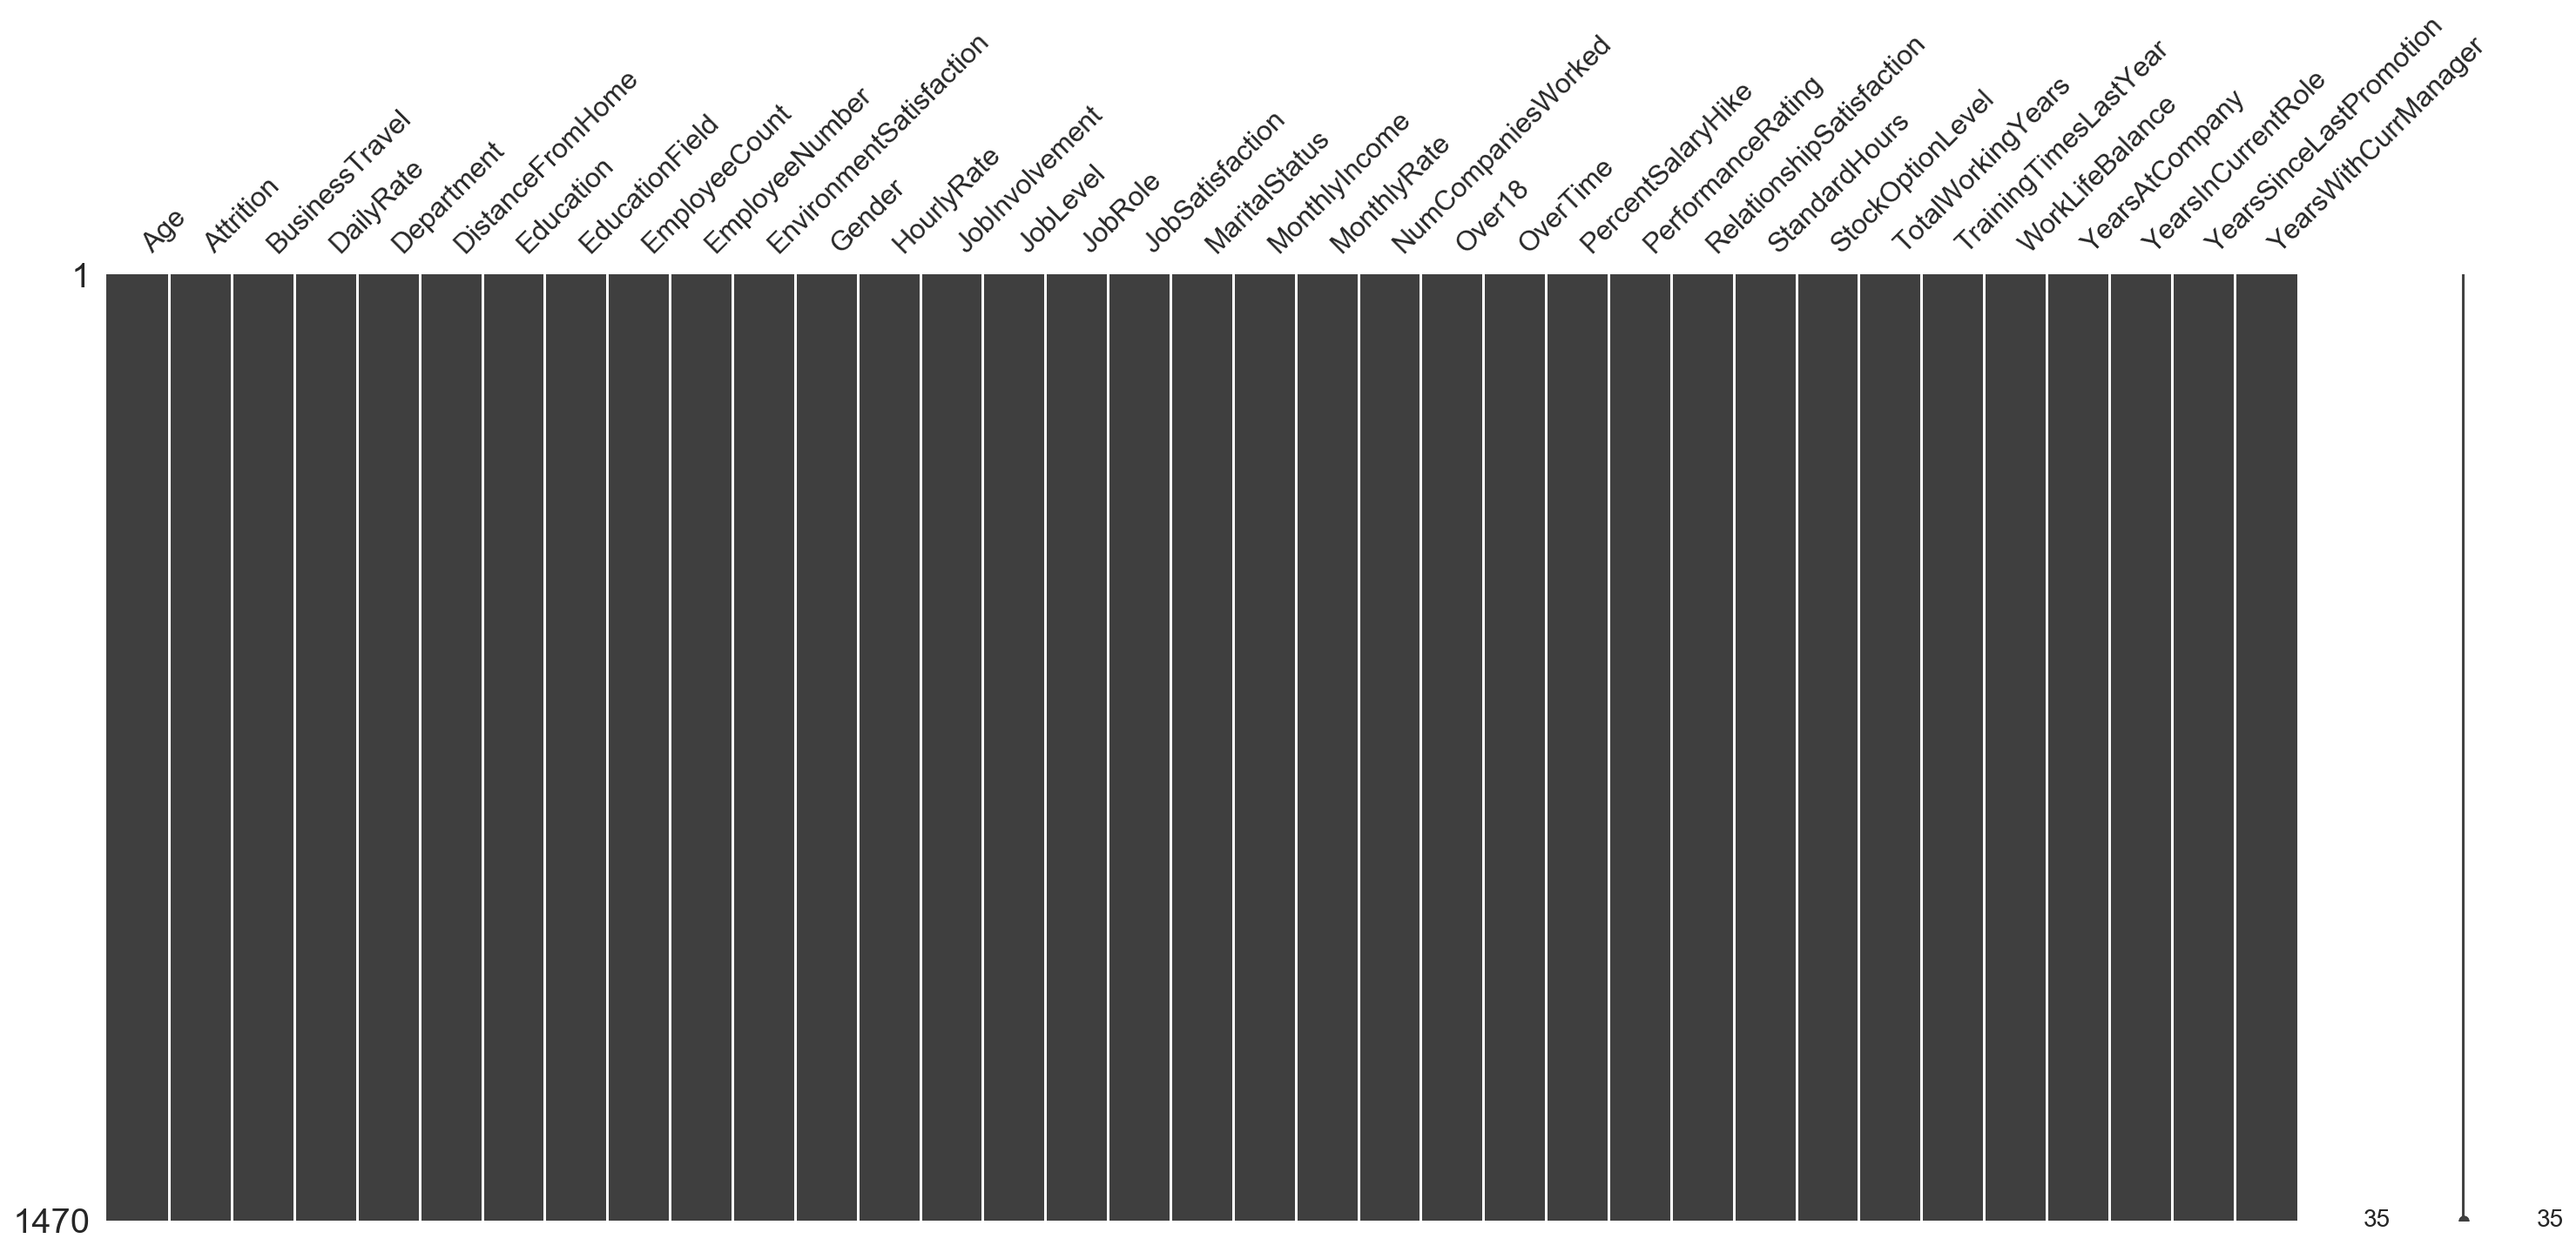

In [29]:
msno.matrix(hr)

In [3]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## columns

- Age : 나이
- Attrition : 이직 여부
- BusinessTravel : 출장 빈도
- DailyRate : 기본 일급
- Department : 부서
- DistanceFromHome : 집 - 회사 거리
- Education : 교육 수준
    1. Below College
    2. College
    3. Bachelor
    4. Master
    5. Doctor
- EducationField : 교육 분야
- EmployeeCount : 직원 수 (전부 같은 데이터: 제외)
- EmployeeNumber : 사원번호 (PK: index로 설정?)
- EnvironmentSatisfaction : 환경 만족도
    1. Low
    2. Medium
    3. High
    4. Very High
- Gender : 성별
- HourlyRate : 기본 시급
- JobInvolvement : 직무 참여
    1. Low
    2. Medium
    3. High
    4. Very High
- JobLevel : 직무 수준
- JobRole : 직무 역할
- JobSatisfaction : 직무 만족도
    1. Low
    2. Medium
    3. High
    4. Very High
- MaritalStatus : 결혼 여부
- MonthlyIncome : 월급
- MonthlyRate : 기본 월급
- NumCompaniesWorked : 근무한 회사 개수
- Over18 : 18세 이상 여부 (전부 같은 데이터: 제외)
- OverTime : 시간외 근무
- PercentSalaryHike : 임금 인상률
- PerformanceRating : 근무평정 (인사고과)
    1. Low
    2. Good
    3. Excellent
    4. Outstanding
- RelationshipSatisfaction : 관계 만족도
    1. Low
    2. Medium
    3. High
    4. Very High
- StandardHours : 표준노동시간 (전부 같은 데이터: 제외)
- StockOptionLevel : 스톡옵션 수준
- TotalWorkingYears : 직장에 다닌 총 근무연수 (이전 회사 포함)
- TrainingTimesLastYear : 최근 교육 횟수
- WorkLifeBalance : 워라벨
    1. Bad
    2. Good
    3. Better
    4. Best
- YearsAtCompany : 현재 회사에서의 총 근무연수
- YearsInCurrentRole : 현재 역할로서의 근무연수
- YearsSinceLastPromotion : 마지막 승진 이후 근무연수
- YearsWithCurrManager : 현재 매니저와 함께 한 근무연수

### WorkLifeBalance & MonthlyIncome

In [4]:
hr['WorkLifeBalance'].unique()

array([1, 3, 2, 4])

WorkLifeBalance
1. Bad
2. Good
3. Better
4. Best

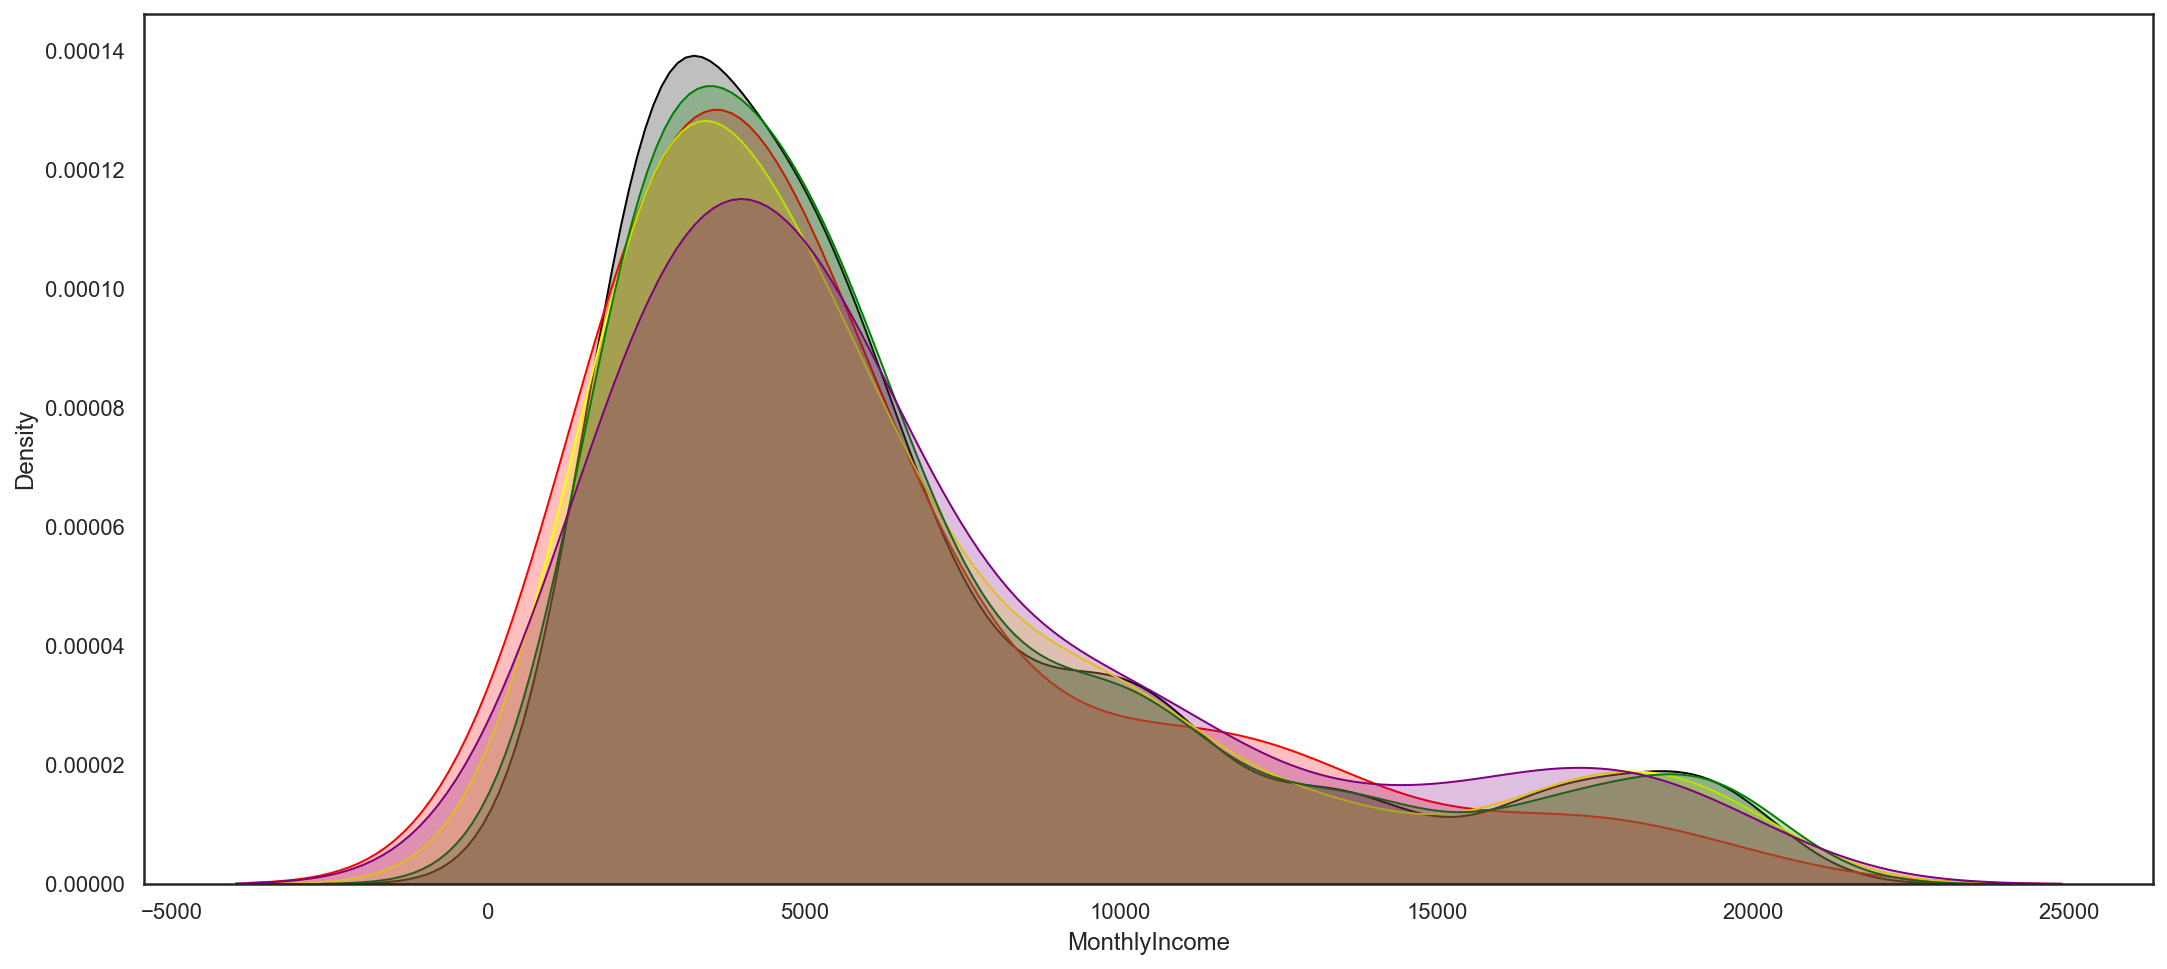

In [5]:
f, ax = plt.subplots(figsize=(18, 8))

sns.kdeplot(hr['MonthlyIncome'], shade=True, legend=False, color='black')
sns.kdeplot(hr[hr['WorkLifeBalance']==1]['MonthlyIncome'], shade=True, legend=False, color='red')
sns.kdeplot(hr[hr['WorkLifeBalance']==2]['MonthlyIncome'], shade=True, legend=False, color='yellow')
sns.kdeplot(hr[hr['WorkLifeBalance']==3]['MonthlyIncome'], shade=True, legend=False, color='green')
sns.kdeplot(hr[hr['WorkLifeBalance']==4]['MonthlyIncome'], shade=True, legend=False, color='purple')


# ax.set_title('MonthlyIncome')

plt.show()

In [6]:
womo = pd.DataFrame(hr[hr['WorkLifeBalance']==1]['MonthlyIncome'].describe())
for i in range(2, 5):
    womo[f'wlb:{i}_MonthlyIncome'] = pd.DataFrame(hr[hr['WorkLifeBalance']==i]['MonthlyIncome'].describe())

womo=womo.rename({'MonthlyIncome':'wlb:1_MonthlyIncome'}, axis=1)
womo

wlb:1_MonthlyIncome  wlb:2_MonthlyIncome  wlb:3_MonthlyIncome  \
count            80.000000           344.000000           893.000000   
mean           5887.137500          6461.808140          6532.232923   
std            4249.460978          4741.487554          4722.367716   
min            1514.000000          1081.000000          1009.000000   
25%            2863.250000          2861.000000          2942.000000   
50%            4269.500000          4970.000000          4941.000000   
75%            6825.750000          8459.500000          8268.000000   
max           19566.000000         19847.000000         19999.000000   

       wlb:4_MonthlyIncome  
count           153.000000  
mean           6746.352941  
std            4791.267630  
min            1261.000000  
25%            3230.000000  
50%            5067.000000  
75%            8853.000000  
max           19626.000000

In [7]:
import plotly.express as px
fig = px.box(womo)
fig.show()

In [8]:
# 해석: 

### NumCompaniesWorked & MonthlyIncome
- 이직하면서 페이가 올라갈수도 있지 않을까?

In [9]:
hr['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3])

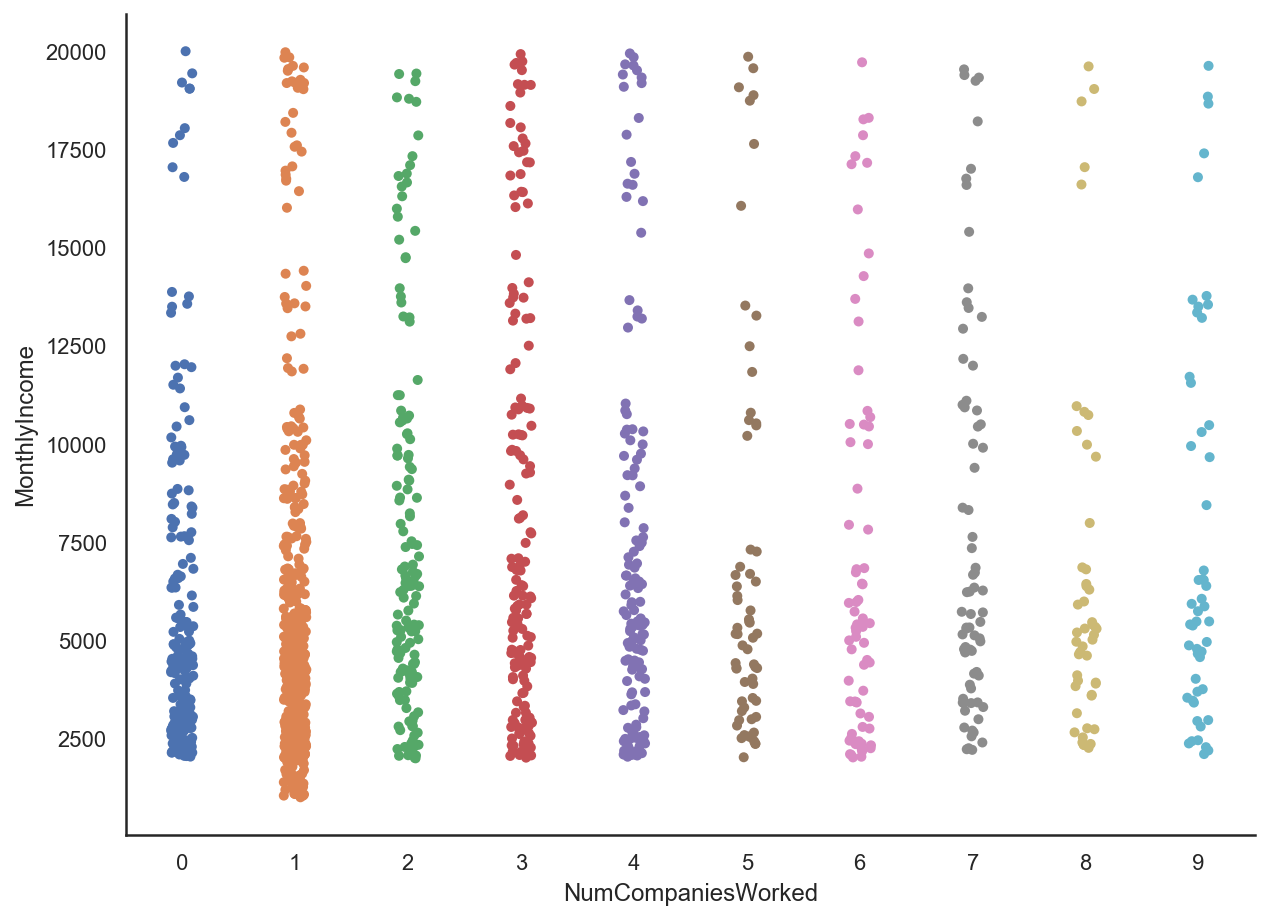

In [10]:
sns.catplot(x='NumCompaniesWorked', y='MonthlyIncome', data=hr, height=6.27, aspect=8.7/6.27)

In [11]:
# 해석 : 음...

### YearsAtCompany & MonthlyIncome

In [12]:
hr['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23])

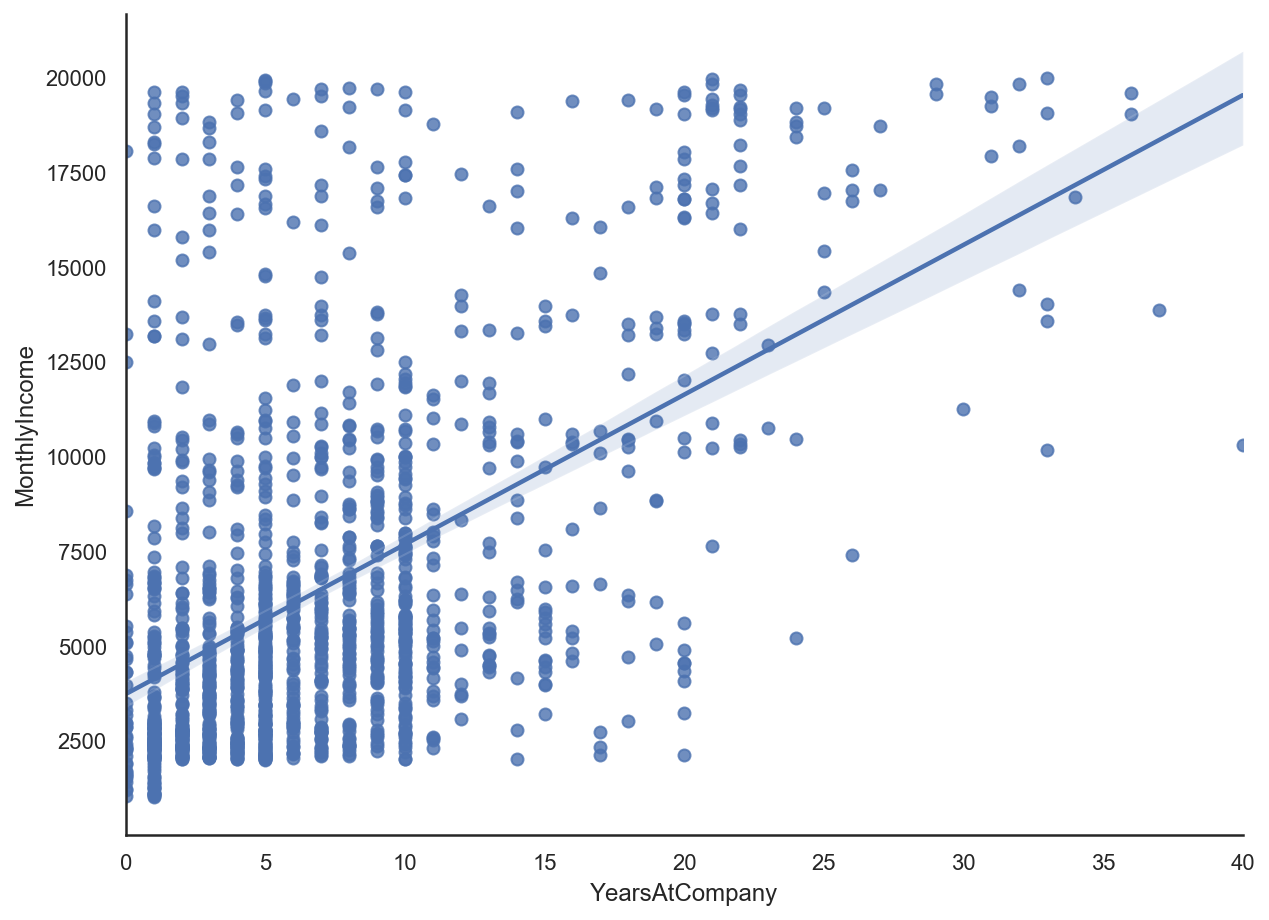

In [13]:
sns.lmplot(x='YearsAtCompany', y='MonthlyIncome', data=hr, height=6.27, aspect=8.7/6.27)

### MonthlyIncome by Gender

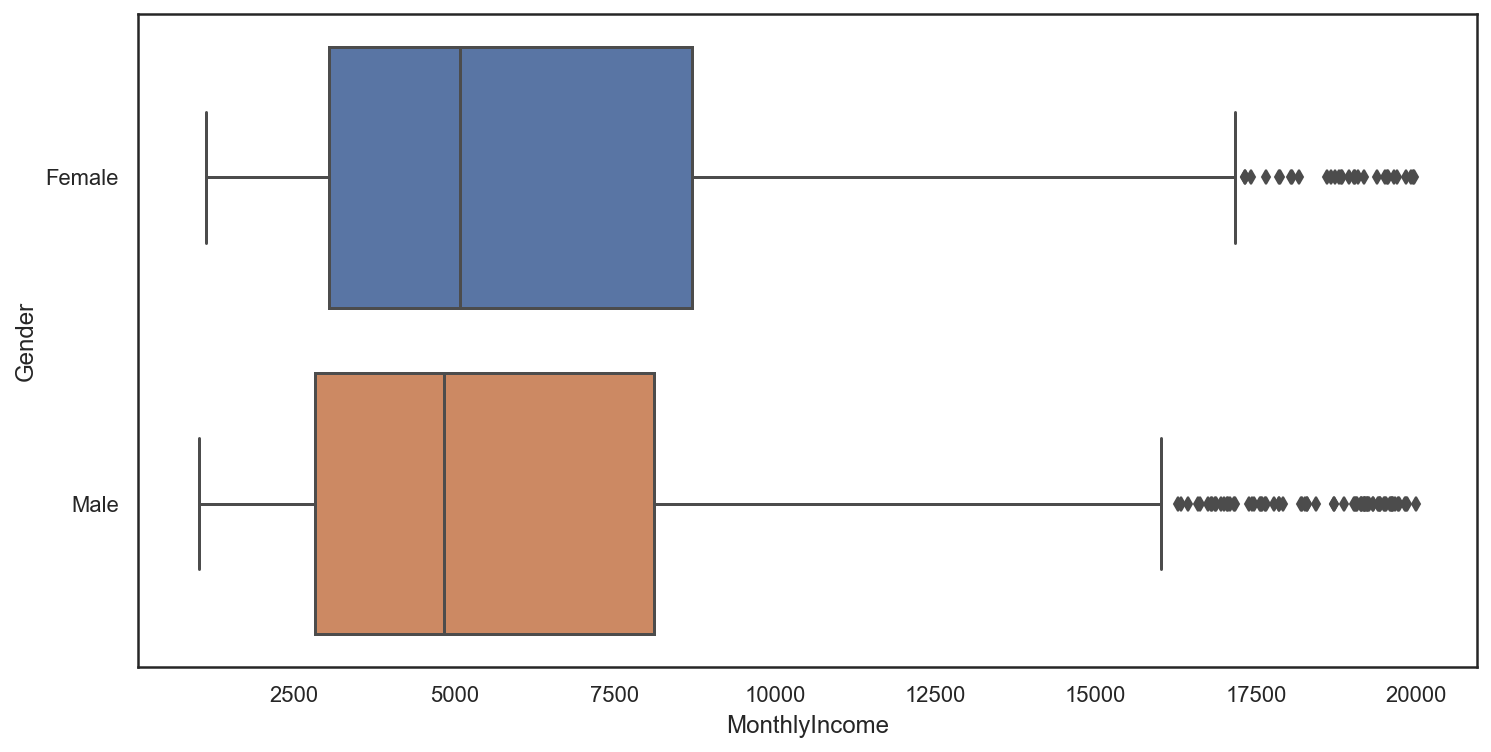

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='MonthlyIncome', y='Gender', data=hr)

### Number of Employees by Department

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



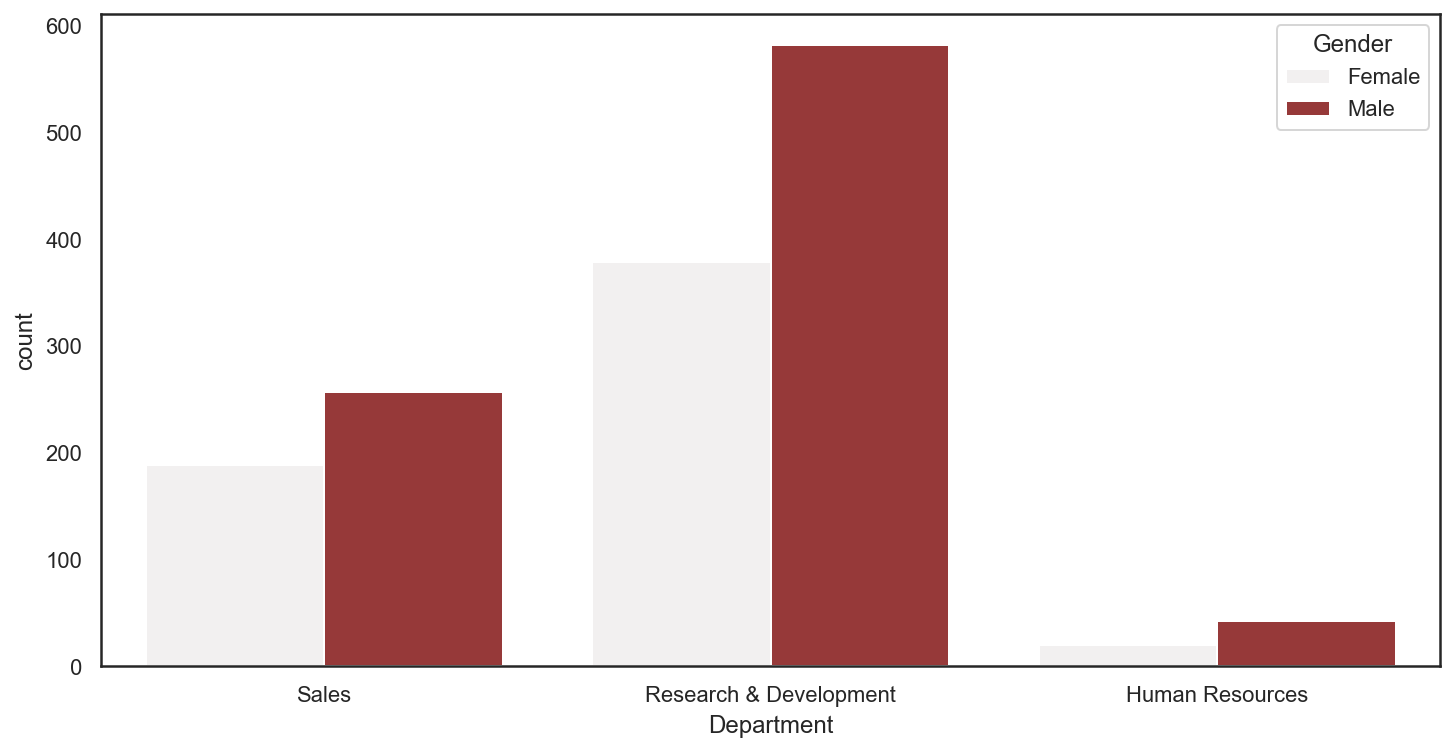

In [15]:
plt.figure(figsize=(12,6))
sns.countplot('Department', hue='Gender', data=hr, color='brown')

### average monthly income by education

In [16]:
hr['Education'].unique()

array([2, 1, 4, 3, 5])

1. Below College
2. College
3. Bachelor
4. Master
5. Doctor

In [17]:
edumo = pd.DataFrame(hr[hr['Education']==1]['MonthlyIncome'].describe())
for i in range(2, 6):
    edumo[f'edu:{i}_MonthlyIncome'] = pd.DataFrame(hr[hr['Education']==i]['MonthlyIncome'].describe())

edumo=edumo.rename({'MonthlyIncome':'edu:1_MonthlyIncome'}, axis=1)
edumo

edu:1_MonthlyIncome  edu:2_MonthlyIncome  edu:3_MonthlyIncome  \
count           170.000000           282.000000           572.000000   
mean           5640.570588          6226.645390          6517.263986   
std            4484.500308          4524.683862          4817.402573   
min            1009.000000          1051.000000          1081.000000   
25%            2693.000000          3067.250000          2759.750000   
50%            3849.000000          4891.500000          4762.000000   
75%            7170.250000          6840.000000          8808.000000   
max           19973.000000         19613.000000         19926.000000   

       edu:4_MonthlyIncome  edu:5_MonthlyIncome  
count           398.000000            48.000000  
mean           6832.402010          8277.645833  
std            4657.191476          5061.430495  
min            1359.000000          2127.000000  
25%            3482.750000          4731.250000  
50%            5341.500000          6203.000000  
75%            8726.500000         11731.500000  
max           19999.000000         19586.000000

In [18]:
fig = px.box(edumo)
fig.show()

In [19]:
# !!!!

### PercentSalaryHike & PerformanceRating

In [20]:
# 인사고과
hr['PerformanceRating'].unique()

array([3, 4])

In [21]:
# 임금 인상률
hr['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25])

In [22]:
hr[hr['PerformanceRating']==3]['PercentSalaryHike'].describe()

count    1244.000000
mean       14.003215
std         2.434333
min        11.000000
25%        12.000000
50%        14.000000
75%        16.000000
max        19.000000
Name: PercentSalaryHike, dtype: float64

In [23]:
hr[hr['PerformanceRating']==4]['PercentSalaryHike'].describe()

count    226.000000
mean      21.849558
std        1.544719
min       20.000000
25%       21.000000
50%       22.000000
75%       23.000000
max       25.000000
Name: PercentSalaryHike, dtype: float64

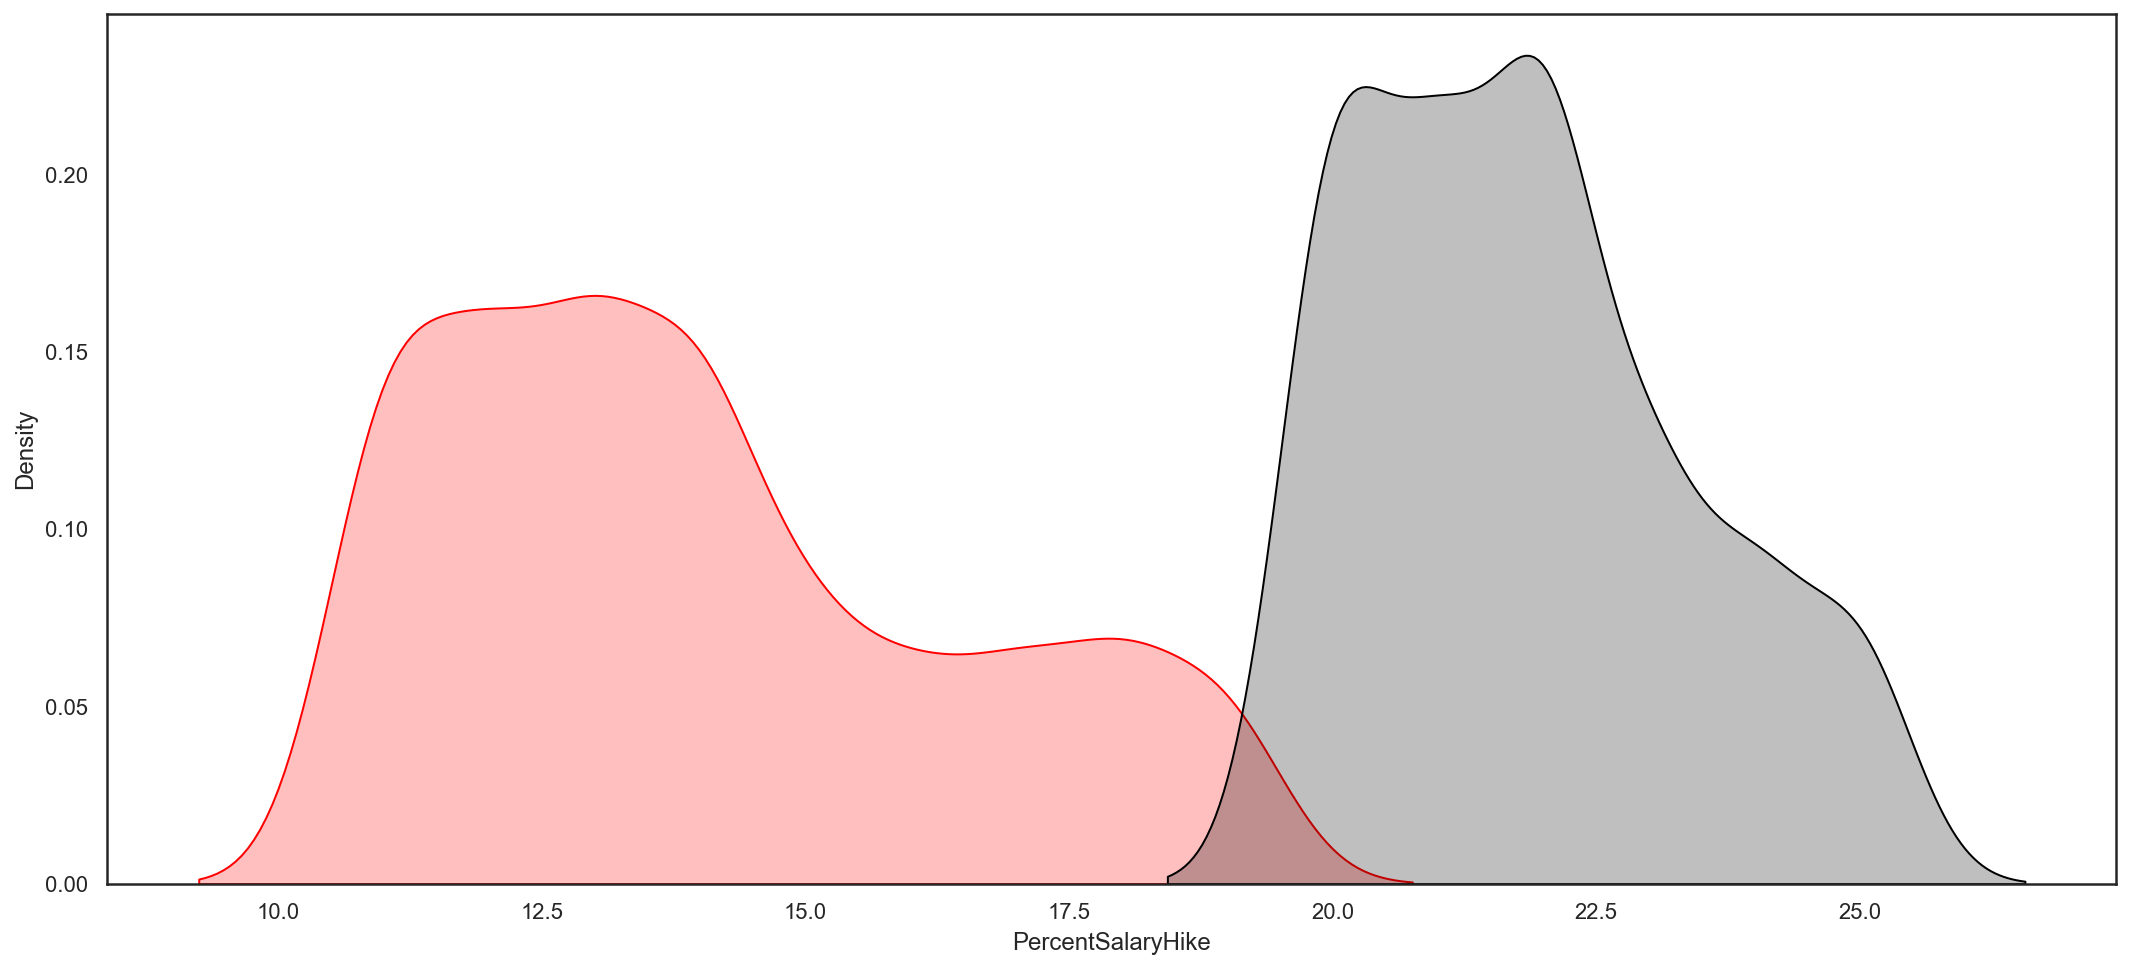

In [24]:
f, ax = plt.subplots(figsize=(18, 8))

sns.kdeplot(hr[hr['PerformanceRating']==3]['PercentSalaryHike'], shade=True, legend=False, color='red')
sns.kdeplot(hr[hr['PerformanceRating']==4]['PercentSalaryHike'], shade=True, legend=False, color='black')

plt.show()

In [25]:
# 오!.! 인사고과에서 4를 받아야 임금 인상률이 높구나
# 인사고과에서 4를 받으면 임금인상률이 최소 20%

### StockOptionLevel & Attrition

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



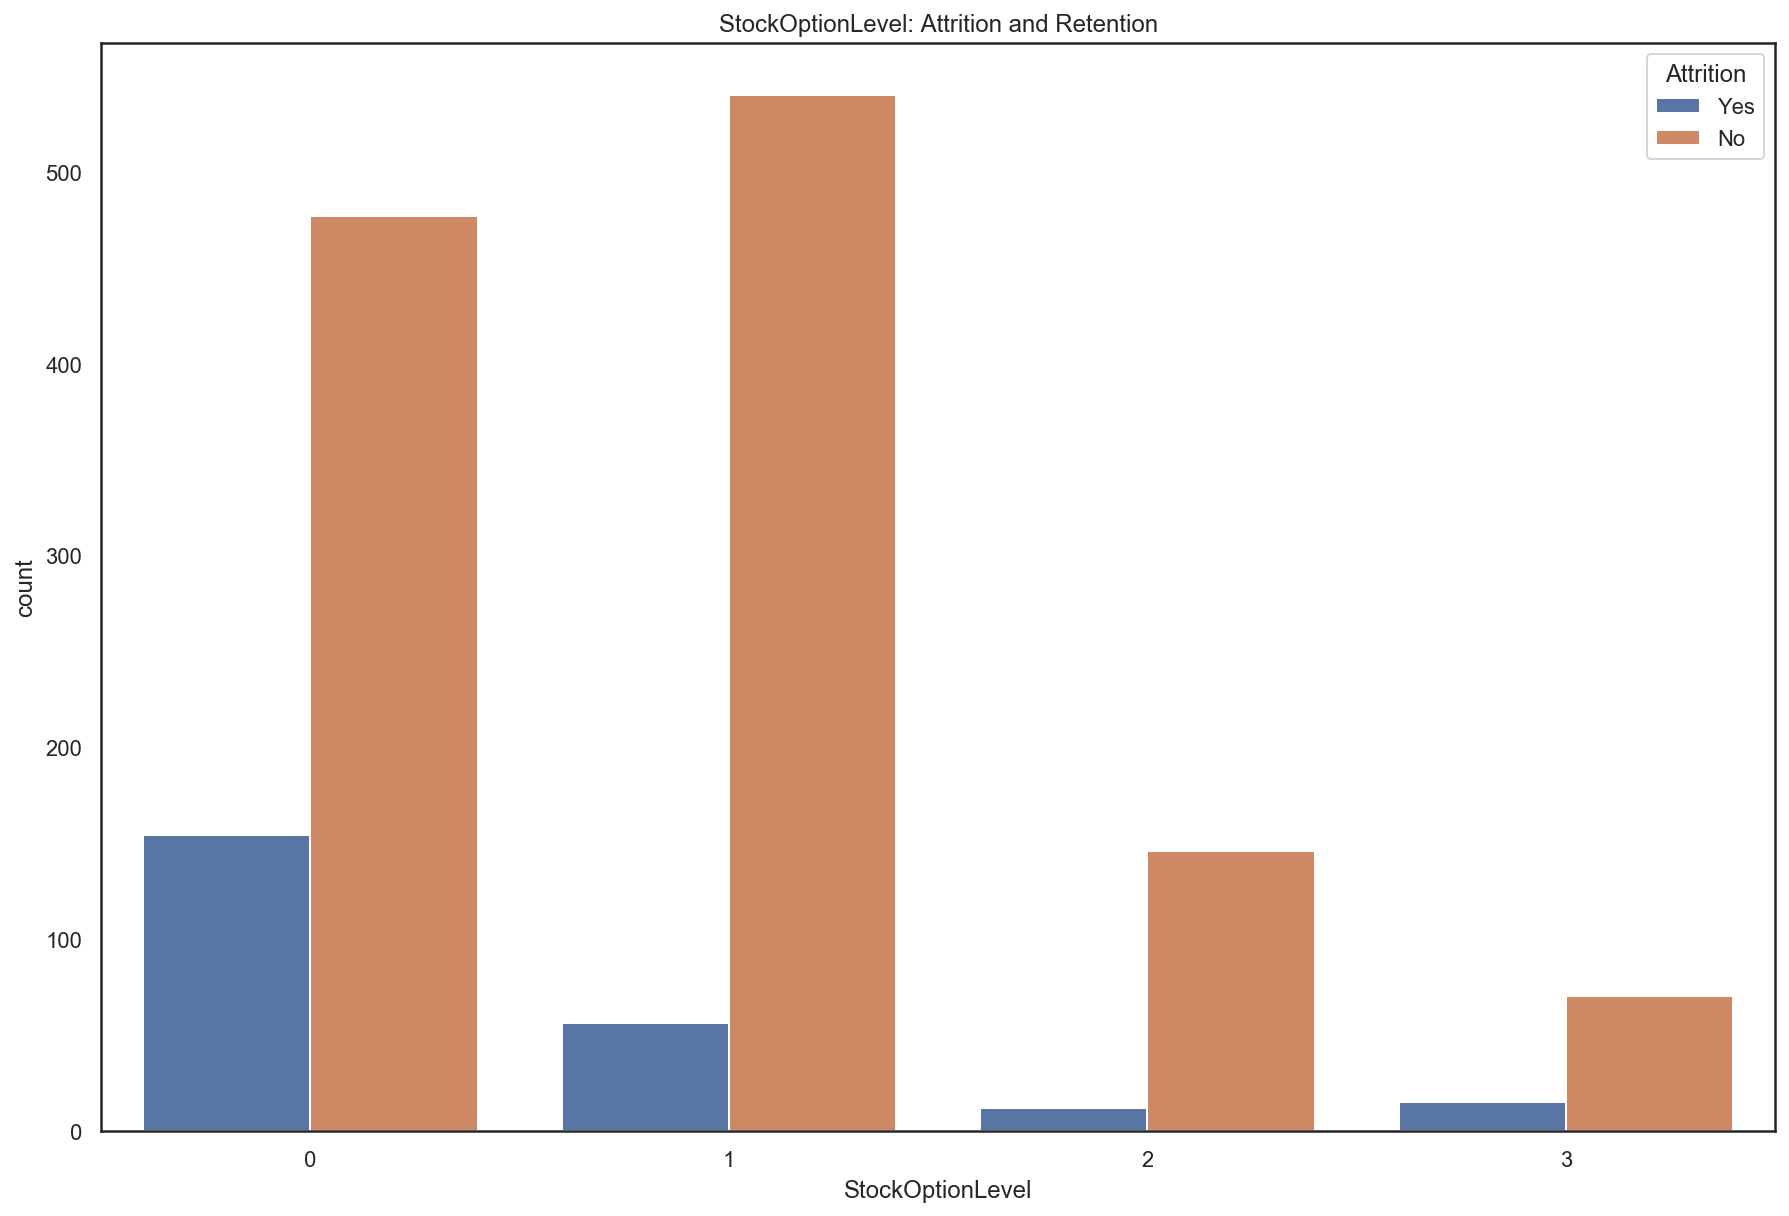

In [26]:
f, ax = plt.subplots(figsize=(15, 10))

sns.countplot('StockOptionLevel', hue='Attrition', data=hr)
ax.set_title('StockOptionLevel: Attrition and Retention')

plt.show()